# MNIST 손글씨 CNN v1
 - 2 x Conv2D layers
 - 1 FCN layer
 - 1 Output layer

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

 - 데이터 전처리

In [14]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [15]:
# X_train, X_test 정규화 (0~1)
X_train = X_train.reshape(-1,28,28,1)/ 255.
X_test = X_test.reshape(-1,28,28,1)/ 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
# one hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

 - 모델 정의 / 설정 / 학습 / 평가

In [17]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
model = Sequential([Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
                    Conv2D(64, kernel_size=(3,3), activation='relu'),
                    Flatten(),Dense(512, activation='relu'),
                    Dense(10, activation='softmax')]) # output node

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               18874880  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_path = 'best_mnist_cnn_v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [21]:
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs = 100, batch_size=200, callbacks=[mc,es])

Epoch 1/100
239/240 [============================>.] - ETA: 0s - loss: 0.1524 - accuracy: 0.9530
Epoch 1: val_loss improved from inf to 0.05605, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 7s 28ms/step - loss: 0.1521 - accuracy: 0.9531 - val_loss: 0.0561 - val_accuracy: 0.9834
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9892
Epoch 2: val_loss improved from 0.05605 to 0.05353, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 6s 23ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0535 - val_accuracy: 0.9851
Epoch 3/100
238/240 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9948
Epoch 3: val_loss improved from 0.05353 to 0.04775, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 6s 23ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 4/100
238/240 [============================>

In [22]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9880


[0.04013516381382942, 0.9879999756813049]

 - 학습과정 시각화

In [23]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

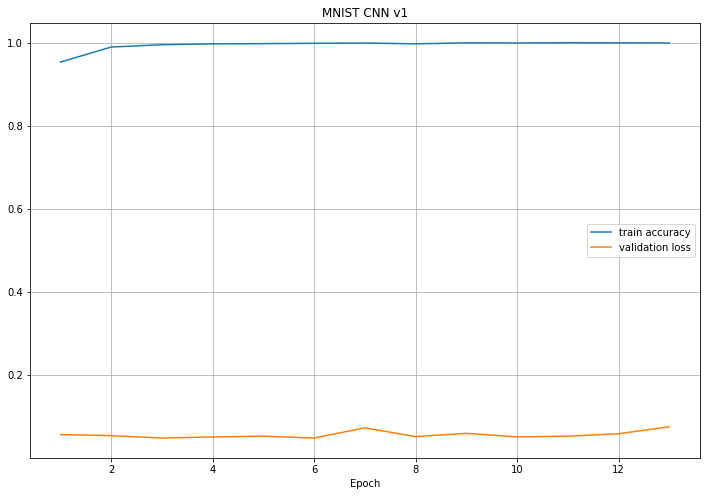

In [24]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title("MNIST CNN v1")
plt.show()